## Name : Ravi Ranjan Chaubey
## Roll Number : BTECH/25015/18
## Lab Quiz ML

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('seedDataSet.csv')
df.head()

,area,perimeter,compactness,kernel_length,width,asy_coeff,grove_length,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


## Exploration of the data

1. display the description of the data
2. display the heatmap to show the correlation between attributes
3. display vertical barplot for mean kernel length for each variety of the wheat

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   area           210 non-null    float64
 1   perimeter      210 non-null    float64
 2   compactness    210 non-null    float64
 3   kernel_length  210 non-null    float64
 4   width          210 non-null    float64
 5   asy_coeff      210 non-null    float64
 6   grove_length   210 non-null    float64
 7   class          210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


In [4]:
#Here is description of data

df.describe().T

,count,mean,std,min,25%,50%,75%,max
area,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
perimeter,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
compactness,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
kernel_length,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
width,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
asy_coeff,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
grove_length,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500
class,210.0,2.000000,0.818448,1.0000,1.00000,2.00000,3.000000,3.0000


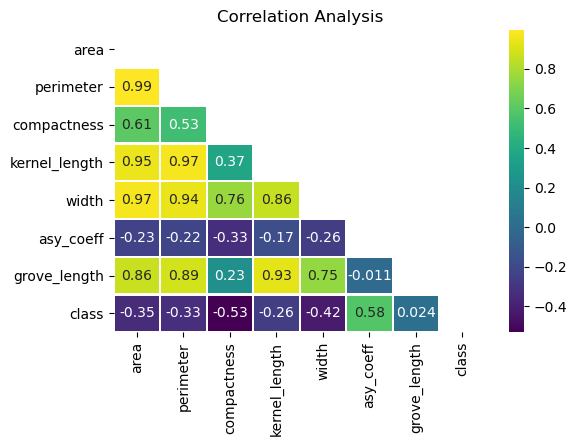

In [5]:
#Here is heatmap of correlation

corr = df.corr()
mask = np.triu(np.ones_like(corr,dtype = bool))

plt.figure(dpi=100)
plt.title('Correlation Analysis')
sns.heatmap(df.corr(),mask=mask,annot=True,lw=1,linecolor='white',cmap='viridis')
plt.xticks(rotation=90)
plt.yticks(rotation = 0)
plt.show()

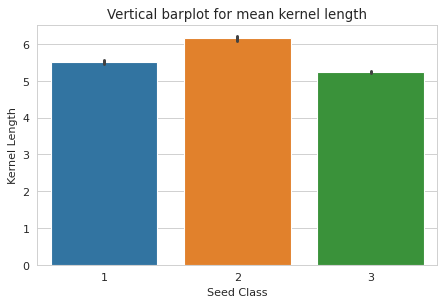

In [6]:
#Here is barplot for kernel leangth

sns.set_style('whitegrid')

fig = plt.figure(dpi = 80, figsize=(5,3))
ax = fig.add_axes([1,1,1,1])

sns.barplot(x = 'class',y = 'kernel_length',
           data = df,ax = ax,estimator=np.mean)
ax.set(xlabel = 'Seed Class',ylabel = 'Kernel Length', 
       title = 'Vertical barplot for mean kernel length');

## 2. Split the data set for training and testing in 70: 30 ratio.

In [7]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [8]:
print(x.shape)

(210, 7)


In [9]:
print(y.shape)

(210,)


In [10]:
x

array([[15.26  , 14.84  ,  0.871 , ...,  3.312 ,  2.221 ,  5.22  ],
       [14.88  , 14.57  ,  0.8811, ...,  3.333 ,  1.018 ,  4.956 ],
       [14.29  , 14.09  ,  0.905 , ...,  3.337 ,  2.699 ,  4.825 ],
       ...,
       [13.2   , 13.66  ,  0.8883, ...,  3.232 ,  8.315 ,  5.056 ],
       [11.84  , 13.21  ,  0.8521, ...,  2.836 ,  3.598 ,  5.044 ],
       [12.3   , 13.34  ,  0.8684, ...,  2.974 ,  5.637 ,  5.063 ]])

In [11]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [12]:
#here spliting data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30,stratify = y)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(147, 7)
(63, 7)
(147,)
(63,)


## Decision Tree and Logistic Regression

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
model_tree = DecisionTreeClassifier(criterion='entropy')

In [15]:
model_tree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [16]:
tree_pred = model_tree.predict(x_test)

In [17]:
model_tree.score(x_test,y_test)

0.8253968253968254

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
model_lr = LogisticRegression()

In [20]:
model_lr.fit(x_train,y_train)

LogisticRegression()

In [21]:
lr_pred = model_lr.predict(x_test)

In [22]:
model_lr.score(x_test,y_test)

0.8888888888888888

## 3. Show the classification report for each learning model

In [23]:
from sklearn.metrics import classification_report

In [24]:
print("Classification report for Decision Tree Classifier : -")
print(classification_report(y_test,tree_pred))

Classification report for Decision Tree Classifier : -
              precision    recall  f1-score   support

           1       0.81      0.62      0.70        21
           2       1.00      0.90      0.95        21
           3       0.71      0.95      0.82        21

    accuracy                           0.83        63
   macro avg       0.84      0.83      0.82        63
weighted avg       0.84      0.83      0.82        63



In [25]:
print("Classification report for Logistic Regression Classifier : -")
print(classification_report(y_test,tree_pred))

Classification report for Logistic Regression Classifier : -
              precision    recall  f1-score   support

           1       0.81      0.62      0.70        21
           2       1.00      0.90      0.95        21
           3       0.71      0.95      0.82        21

    accuracy                           0.83        63
   macro avg       0.84      0.83      0.82        63
weighted avg       0.84      0.83      0.82        63



## 4. Show the confusion matrices for each learning model

In [26]:
from sklearn.metrics import confusion_matrix

In [27]:
print("Confusion Matrix for Decision Tree Classifier : -\n")
print(confusion_matrix(y_test,tree_pred))

Confusion Matrix for Decision Tree Classifier : -

[[13  0  8]
 [ 2 19  0]
 [ 1  0 20]]


In [28]:
print("Confusion Matrix for Logistic Regression Classifier : -\n")
print(confusion_matrix(y_test,tree_pred))

Confusion Matrix for Logistic Regression Classifier : -

[[13  0  8]
 [ 2 19  0]
 [ 1  0 20]]


## 5. Show the importance of features in case of logistic regression using horizontal barplot.

In [29]:
features = list(df.columns)
features.pop()
features

['area',
 'perimeter',
 'compactness',
 'kernel_length',
 'width',
 'asy_coeff',
 'grove_length']

### Feature importance of Logistic Regression

In [30]:
lr_coef = model_lr.coef_

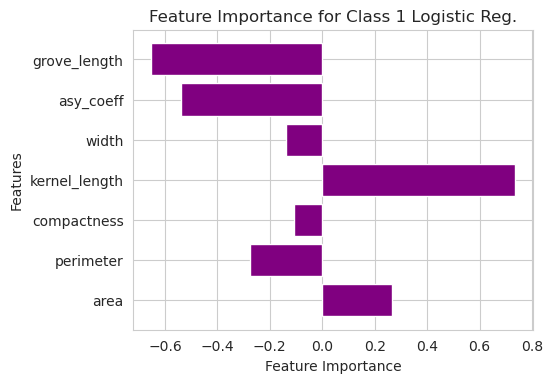

In [31]:
fig = plt.figure(dpi = 100,figsize=(4,3))
ax = fig.add_axes([1,1,1,1])

ax.barh(features, lr_coef[0],color = 'purple')
ax.set(xlabel = 'Feature Importance',
      ylabel = 'Features',
      title = 'Feature Importance for Class 1 Logistic Reg.');

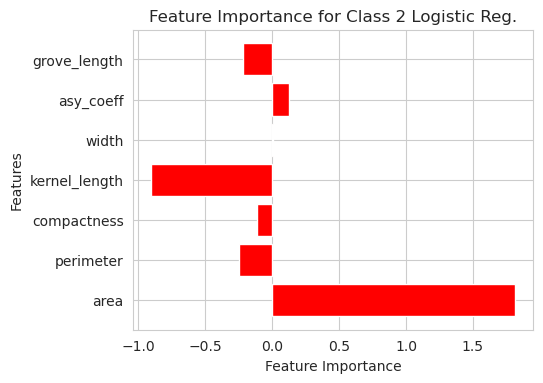

In [32]:
fig = plt.figure(dpi = 100,figsize=(4,3))
ax = fig.add_axes([1,1,1,1])

ax.barh(features, lr_coef[1],color = 'red')
ax.set(xlabel = 'Feature Importance',
      ylabel = 'Features',
      title = 'Feature Importance for Class 2 Logistic Reg.');

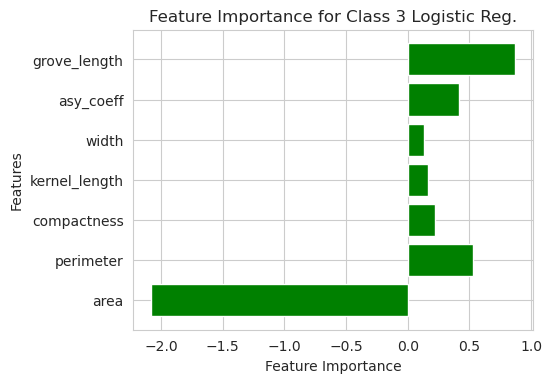

In [33]:
fig = plt.figure(dpi = 100,figsize=(4,3))
ax = fig.add_axes([1,1,1,1])

ax.barh(features, lr_coef[2],color = 'green')
ax.set(xlabel = 'Feature Importance',
      ylabel = 'Features',
      title = 'Feature Importance for Class 3 Logistic Reg.');

### Feature importance of Logistic Regression

In [34]:
feat_imp = model_tree.feature_importances_
feat_imp

array([0.30680965, 0.02789317, 0.        , 0.        , 0.04707512,
       0.12519706, 0.49302499])

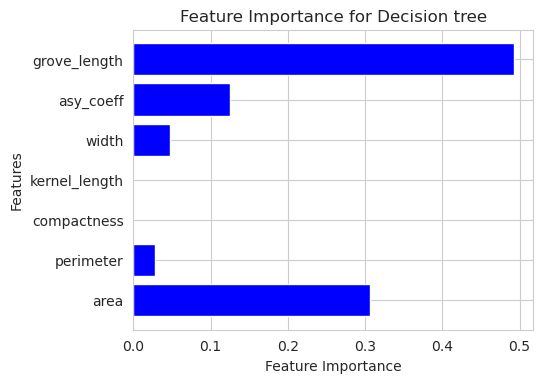

In [35]:
fig = plt.figure(dpi = 100,figsize=(4,3))
ax = fig.add_axes([1,1,1,1])

ax.barh(features, feat_imp,color = 'blue')
ax.set(xlabel = 'Feature Importance',
      ylabel = 'Features',
      title = 'Feature Importance for Decision tree');

## 6. Show the decision tree in case of decision tree algorithm

In [36]:
from sklearn.tree import plot_tree

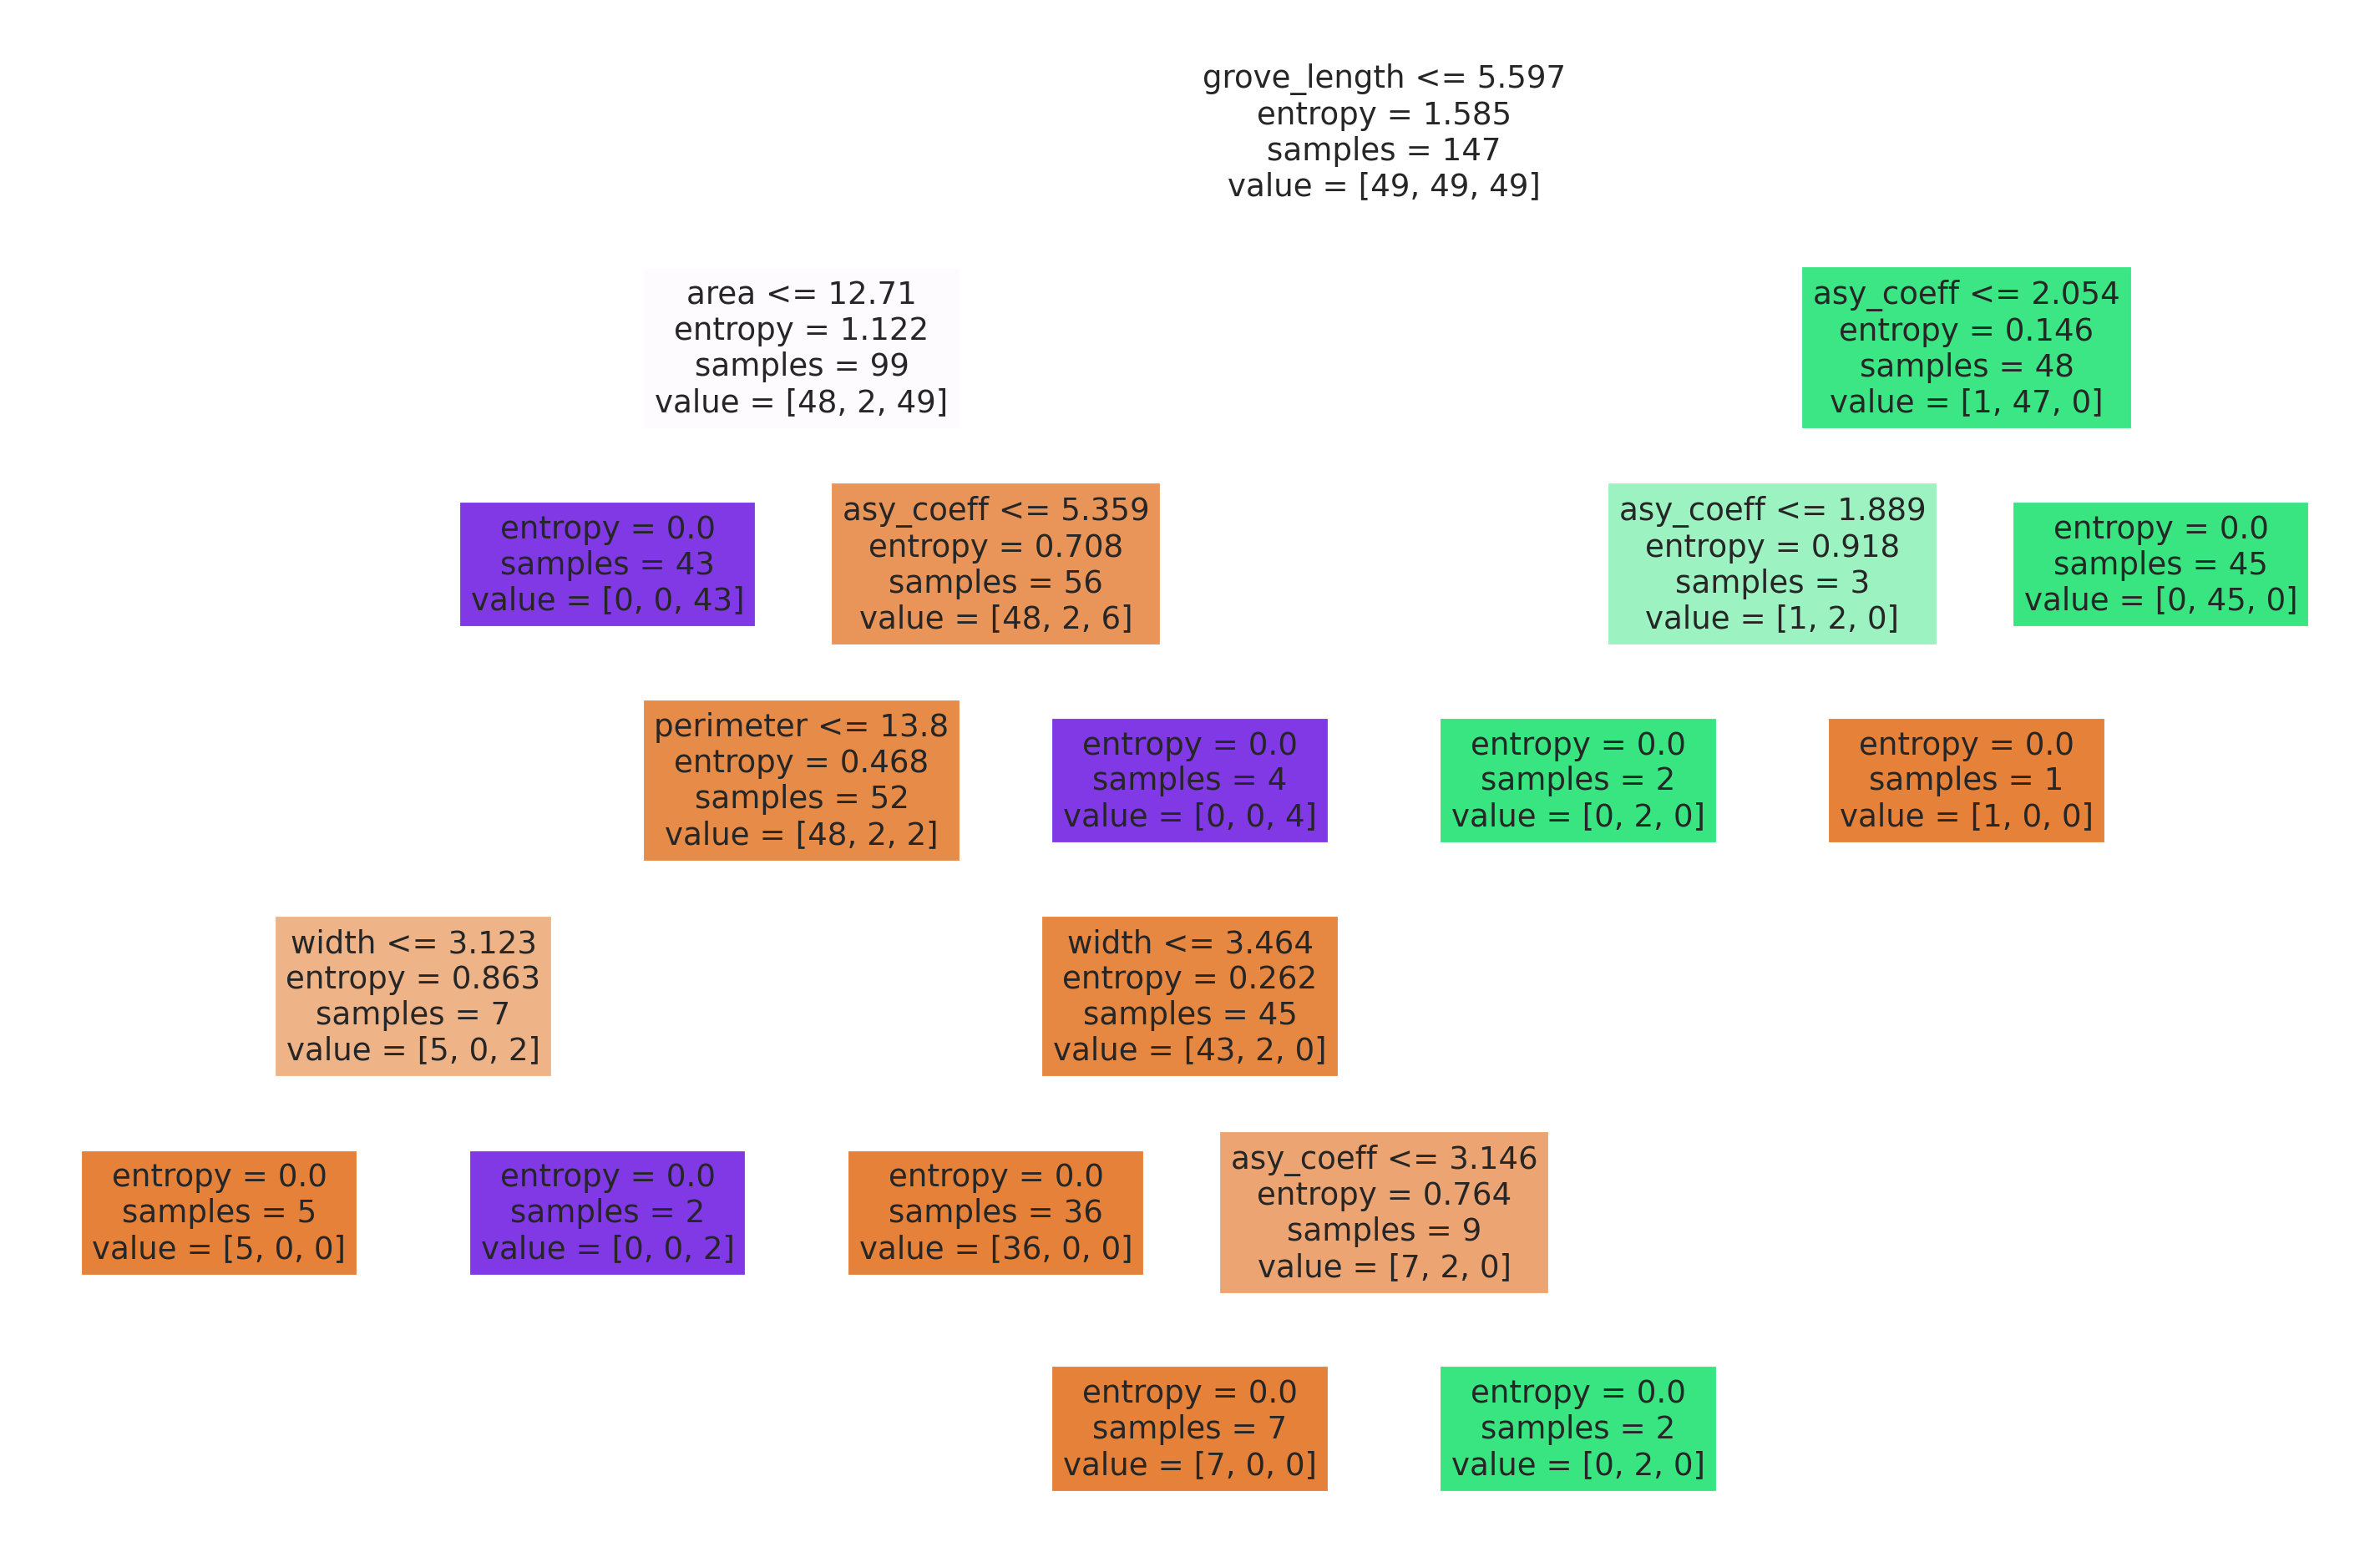

In [37]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (12,8), dpi=300)

plot_tree(model_tree,
         feature_names = features,
          filled = True);

## 7. Write the comments on the comparison of both the classifiers’ performance. (Non-anonymous question)

In [38]:
print(classification_report(y_test,tree_pred))

              precision    recall  f1-score   support

           1       0.81      0.62      0.70        21
           2       1.00      0.90      0.95        21
           3       0.71      0.95      0.82        21

    accuracy                           0.83        63
   macro avg       0.84      0.83      0.82        63
weighted avg       0.84      0.83      0.82        63



In [39]:
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

           1       0.94      0.71      0.81        21
           2       0.95      0.95      0.95        21
           3       0.81      1.00      0.89        21

    accuracy                           0.89        63
   macro avg       0.90      0.89      0.89        63
weighted avg       0.90      0.89      0.89        63



**Datset has 210 observation of 10 features.**

**We have applied Logistric Regression and Decision tree to predict 3 classes. This is problem of multiclass classification. Between these two model, following inferences has been drawn :-**

1. F1 score of Decision tree is less than Logistic Regression.
2. Accuracy Score of Decision tree is less than Logisctic Regression.

`From above two point it is clear than Logistic Regression classifier is doing sligh better than Decision Tree`